# Apriori Algorithm 

This notebook demonstrates the use of the Apriori algorithm to generate frequent itemsets and association rules from a transaction dataset.

## Steps

1. **Import Libraries**: Import the necessary libraries for data manipulation and the Apriori algorithm.
2. **Load Dataset**: Load the transaction dataset into a pandas DataFrame.
3. **Generate Frequent Itemsets**: Use the `apriori` function to generate frequent itemsets with a minimum support threshold.
4. **Generate Association Rules**: Use the `association_rules` function to generate association rules from the frequent itemsets, using lift as the metric.
5. **Sort Rules**: Sort the generated rules by the lift metric in ascending order.
6. **Display Rules**: Display the sorted rules.

In [6]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

root = '/Users/carolinalara/PycharmProjects/RetoEntrega0/Data/'

In [7]:
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')

In [8]:
order_products = pd.concat([order_products_prior, order_products_train])
order_products.shape

(33819106, 4)

In [9]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
order_products.product_id.nunique()

49685

## Out of 49685 keeping top 100 most frequent products.

In [11]:
product_counts = order_products.groupby('product_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
product_counts = product_counts.sort_values('frequency', ascending=False)[0:100].reset_index(drop = True)
product_counts = product_counts.merge(products, on = 'product_id', how = 'left')
product_counts.head(10)

,product_id,frequency,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4
5,47766,184224,Organic Avocado,24,4
6,47626,160792,Large Lemon,24,4
7,16797,149445,Strawberries,24,4
8,26209,146660,Limes,24,4
9,27845,142813,Organic Whole Milk,84,16


## Keeping 100 most frequent items in order_products dataframe

In [12]:
freq_products = list(product_counts.product_id)
freq_products[1:10]

[13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845]

In [13]:
order_products = order_products[order_products.product_id.isin(freq_products)]
order_products.shape

(7795471, 4)

In [14]:
order_products.order_id.nunique()

2444982

## Merge the order_products DataFrame with the products DataFrame on the product_id column

In [15]:
order_products = order_products.merge(products, on = 'product_id', how='left')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,28985,2,1,Michigan Organic Kale,83,4
1,2,17794,6,1,Carrots,83,4
2,3,24838,2,1,Unsweetened Almondmilk,91,16
3,3,21903,4,1,Organic Baby Spinach,123,4
4,3,46667,6,1,Organic Ginger Root,83,4


In [16]:
transactions_list = order_products.groupby('order_id')['product_name'].apply(list).tolist()
transactions_list[:10]

[['Cucumber Kirby',
  'Bag of Organic Bananas',
  'Organic Hass Avocado',
  'Organic Whole String Cheese'],
 ['Michigan Organic Kale', 'Carrots'],
 ['Unsweetened Almondmilk', 'Organic Baby Spinach', 'Organic Ginger Root'],
 ['Bag of Organic Bananas',
  'Organic Raspberries',
  '2% Reduced Fat Milk',
  'Organic Hass Avocado'],
 ['Extra Virgin Olive Oil'],
 ['Banana',
  'Organic Cilantro',
  'Organic Avocado',
  'Yellow Onions',
  'Organic Strawberries',
  'Organic Black Beans',
  'Organic Half & Half'],
 ['Extra Virgin Olive Oil'],
 ['Soda', 'Sparkling Natural Mineral Water'],
 ['Organic Whole Milk', 'Organic Broccoli Florets', 'Honeycrisp Apple'],
 ['Spring Water']]

## Transforms the transactions_list into a one-hot encoded NumPy boolean

In [17]:
transaction_encoder = TransactionEncoder()
transaction_array = transaction_encoder.fit(transactions_list).transform(transactions_list)
transaction_df = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_)
transaction_df

,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,...,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444977,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2444978,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2444979,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2444980,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## Generate frequent itemsets

In [18]:
frequent_items = apriori(transaction_df, min_support=0.01, use_colnames=True, low_memory=True)
frequent_items.head()

,support,itemsets
0,0.016062,(100% Raw Coconut Water)
1,0.025814,(100% Whole Wheat Bread)
2,0.015800,(2% Reduced Fat Milk)
3,0.035694,(Apple Honeycrisp Organic)
4,0.029101,(Asparagus)


## Generate association rules

In [19]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
27,(Banana),(Organic Strawberries),0.200938,0.112711,0.023857,0.118728,1.053382,1.0,0.001209,1.006827,0.063420,0.082324,0.006781,0.165196
26,(Organic Strawberries),(Banana),0.112711,0.200938,0.023857,0.211665,1.053382,1.0,0.001209,1.013607,0.057114,0.082324,0.013424,0.165196
23,(Banana),(Organic Baby Spinach),0.200938,0.102948,0.021839,0.108683,1.055712,1.0,0.001152,1.006435,0.066043,0.077429,0.006394,0.160408
22,(Organic Baby Spinach),(Banana),0.102948,0.200938,0.021839,0.212133,1.055712,1.0,0.001152,1.014209,0.058829,0.077429,0.014010,0.160408
19,(Banana),(Limes),0.200938,0.059984,0.013539,0.067380,1.123292,1.0,0.001486,1.007930,0.137360,0.054729,0.007867,0.146546
18,(Limes),(Banana),0.059984,0.200938,0.013539,0.225713,1.123292,1.0,0.001486,1.031996,0.116763,0.054729,0.031004,0.146546
29,(Banana),(Organic Whole Milk),0.200938,0.058411,0.013368,0.066529,1.138984,1.0,0.001631,1.008697,0.152710,0.054346,0.008622,0.147697
28,(Organic Whole Milk),(Banana),0.058411,0.200938,0.013368,0.228866,1.138984,1.0,0.001631,1.036216,0.129594,0.054346,0.034950,0.147697
8,(Bag of Organic Bananas),(Organic Whole Milk),0.161527,0.058411,0.011288,0.069883,1.196413,1.0,0.001853,1.012335,0.195794,0.054100,0.012184,0.131568
9,(Organic Whole Milk),(Bag of Organic Bananas),0.058411,0.161527,0.011288,0.193253,1.196413,1.0,0.001853,1.039326,0.174352,0.054100,0.037838,0.131568


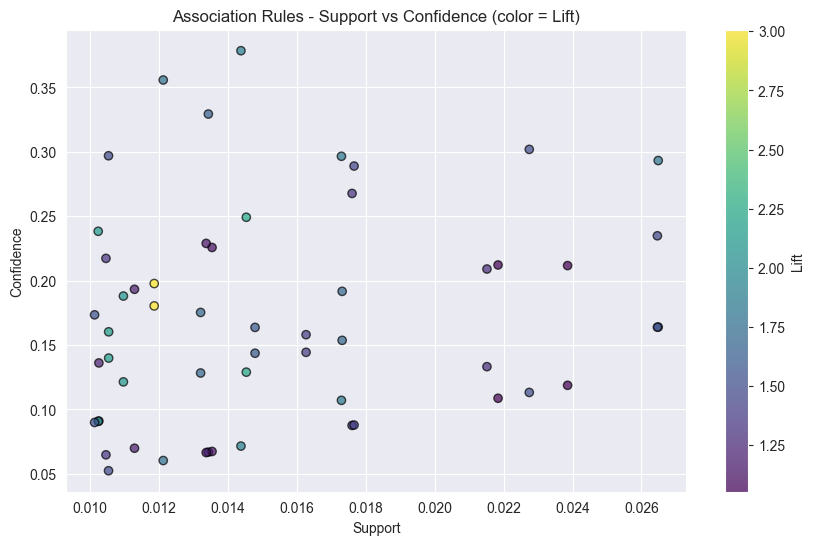

In [21]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(rules['support'], rules['confidence'], 
            alpha=0.7, 
            c=rules['lift'], 
            cmap='viridis', 
            edgecolors='k')

plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules - Support vs Confidence (color = Lift)')
plt.grid(True)
plt.show()

